# Machine Learning 11

In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

**Hint:**

import packages and data from pandas import read_csv

    from pandas import datetime
    from matplotlib import pyplot
    from statsmodels.tsa.arima_model import ARIMA
    from sklearn.metrics import mean_squared_error
    
    def parser(x):
        return datetime.strptime('190'+x, '%Y-%m')

    series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [23]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

def parser(x):
    return datetime.strptime("190"+x, "%Y-%m")

sales = pd.read_csv("./shampoo.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
sales

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

**See sales trend by data**

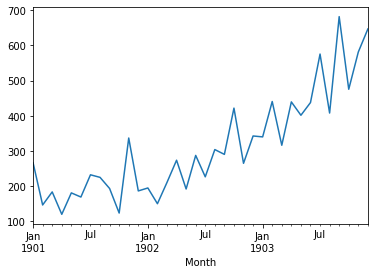

In [24]:
sales.plot()

**Stationary means mean,variance and covariance is constant over periods.**

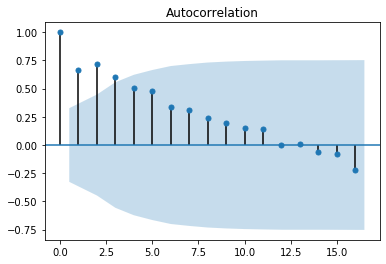

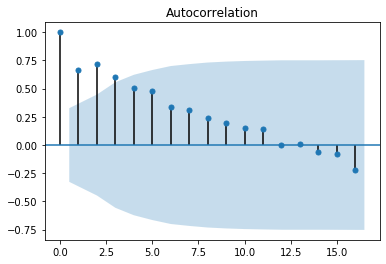

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

**Converting series to stationary**

In [27]:
sales.shift(1)

Month
1901-01-01      NaN
1901-02-01    266.0
1901-03-01    145.9
1901-04-01    183.1
1901-05-01    119.3
1901-06-01    180.3
1901-07-01    168.5
1901-08-01    231.8
1901-09-01    224.5
1901-10-01    192.8
1901-11-01    122.9
1901-12-01    336.5
1902-01-01    185.9
1902-02-01    194.3
1902-03-01    149.5
1902-04-01    210.1
1902-05-01    273.3
1902-06-01    191.4
1902-07-01    287.0
1902-08-01    226.0
1902-09-01    303.6
1902-10-01    289.9
1902-11-01    421.6
1902-12-01    264.5
1903-01-01    342.3
1903-02-01    339.7
1903-03-01    440.4
1903-04-01    315.9
1903-05-01    439.3
1903-06-01    401.3
1903-07-01    437.4
1903-08-01    575.5
1903-09-01    407.6
1903-10-01    682.0
1903-11-01    475.3
1903-12-01    581.3
Name: Sales, dtype: float64

In [28]:
sales_diff = sales.diff(periods=1)
#integrated of order 1, denoted by d(for diff), one of the parameter of ARIMA model

sales_diff = sales_diff[1:]
sales_diff.head()

Month
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
Name: Sales, dtype: float64

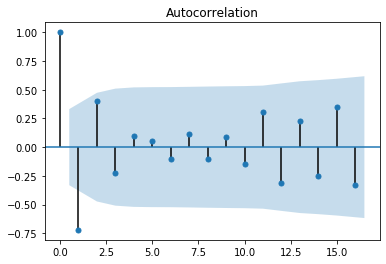

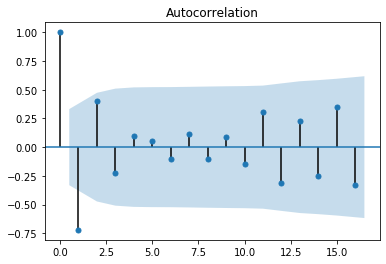

In [29]:
plot_acf(sales_diff)

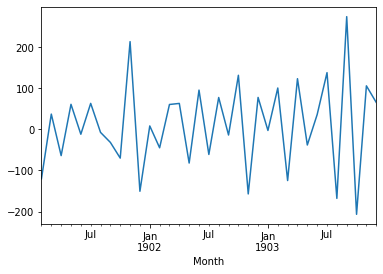

In [30]:
sales_diff.plot()

In [31]:
X = sales.values
train = X[0:28] # 27 data as train data
test = X[28:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28
8


## ARIMA Model

In [32]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [33]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 335.09040511436183
(0, 0, 1) 334.3872829957554
(0, 0, 2) 329.31881164853866
(0, 0, 3) 330.92416191319046
(0, 0, 4) nan
(0, 0, 5) nan
(0, 1, 0) 324.4220452613395
(0, 1, 1) 308.0017050784539
(0, 1, 2) 306.7698573618047
(0, 2, 0) 343.4502397203673
(0, 2, 1) 318.26218827679946
(1, 0, 0) 330.89180942550934
(1, 0, 1) 325.63339493074227
(1, 0, 2) 322.4524346205785
(1, 0, 4) nan
(1, 1, 0) 309.118876775515
(1, 1, 1) 306.7909360891018
(1, 1, 2) 306.9108665144183
(1, 1, 3) 311.8713030852822
(1, 1, 4) 309.1194606813609
(1, 1, 5) 314.62738257876185
(1, 2, 0) 317.80308367611093
(1, 2, 1) 304.2885462718449
(1, 2, 2) nan
(1, 2, 3) nan
(1, 2, 4) nan
(2, 0, 0) 322.0934945921372
(2, 0, 1) 323.69065121138874
(2, 0, 4) nan
(2, 1, 0) 310.4797159942176
(2, 1, 1) 308.6750869738263
(2, 1, 4) 310.7392460030176
(2, 1, 5) 309.2613029479329
(2, 2, 0) 317.24389670066813
(2, 2, 1) 305.70536447195144
(2, 2, 3) 301.9734146430073
(2, 2, 4) 332.9979585712875
(3, 0, 0) 324.05648946266103
(3, 0, 1) 349.725052627

**It seems that out of different combinations ranging from order (0,0,0) to (5,5,5) param with values as p=3, d=2 and q=3 is the best because of lowest AIC value**

In [34]:
model_arima = ARIMA(train, order=(3,2,3))
model_arima_fit = model_arima.fit()

model_arima_fit.aic

298.7706869981032

In [35]:
predictions = model_arima_fit.forecast(steps=8)[0]
predictions

array([334.25872547, 464.32973424, 426.09159087, 496.34581076,
       443.7915713 , 500.24799879, 504.44732181, 564.70641415])

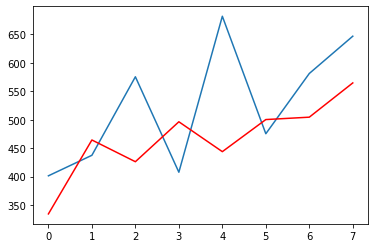

In [36]:
plt.plot(test)
plt.plot(predictions, color='red')

In [38]:
mean_squared_error(test,predictions)

13180.776571473129